# MSD analysis
This notebook contains an analysis of lithium mean-squared-displacements (MSDs) in Li<sub>6</sub>PS<sub>5</sub><i>X</i> (<i>X</i>=I, Cl) at 500 K.

For each system (Li<sub>6</sub>PS<sub>5</sub>I and Li<sub>6</sub>PS<sub>5</sub>Cl) and each degree of anion–site-inversion (0 %, 50 %, and 100%) we calculate the MSD as a function of time, and estimate 95% confidence intervals using bootstrapping.

In [1]:
import yaml
from pymatgen.io.vasp import Xdatcar
from kinisi.analyze import MSDAnalyzer
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import sys
sys.path.insert(0, "../../scripts/")
from utils import flatten_list

In [2]:
# Parameters for creating a Pymatgen DiffusionAnalyzer object
msd_params = { 'specie': 'Li',
               'time_step': 2.0,
               'step_skip': 50,
               'min_obs': 50 }

In [3]:
with open('../md_runs.yaml', 'r') as f:
    md_runs = yaml.safe_load(f)
print(yaml.dump(md_runs, default_flow_style=True))

{Li6PS5Cl: {0p: [1, 2, 3, 4, 5], 100p: [1, 2, 3, 4, 5, 6], 50p: [1, 2, 3, 4, 5, 6]},
  Li6PS5I: {0p: [1, 2, 3, 4, 5, 6], 100p: [1, 2, 3, 4, 5, 6, 7], 50p: [1, 2, 3, 4,
      5, 6, 7]}}



In [4]:
data_dir = '../../data'
msda = {}
errors = {}
for system in md_runs:
    msda[system] = {}
    for disorder, runs in md_runs[system].items():
        print(f'Analysing {system}: {disorder}')
        xdatcar_filenames = [ f'{data_dir}/{system}/{disorder}/run{i}/actual_XDATCAR.gz' for i in runs ]
        xdatcars = ( Xdatcar( f ) for f in xdatcar_filenames )
        structures = flatten_list( [ x.structures for x in xdatcars ] )
        msda[system][disorder] = MSDAnalyzer(structures, msd_params, format='structures')

Analysing Li6PS5I: 0p


Bootstrapping Displacements: 100%|██████████| 233/233 [00:20<00:00, 11.23it/s]


Analysing Li6PS5I: 50p


Bootstrapping Displacements: 100%|██████████| 233/233 [00:21<00:00, 10.89it/s]


Analysing Li6PS5I: 100p


Bootstrapping Displacements: 100%|██████████| 233/233 [00:20<00:00, 11.25it/s]


Analysing Li6PS5Cl: 0p


Bootstrapping Displacements: 100%|██████████| 233/233 [00:21<00:00, 10.83it/s]


Analysing Li6PS5Cl: 50p


Bootstrapping Displacements: 100%|██████████| 233/233 [00:23<00:00,  9.79it/s]


Analysing Li6PS5Cl: 100p


Bootstrapping Displacements: 100%|██████████| 233/233 [00:21<00:00, 10.75it/s]


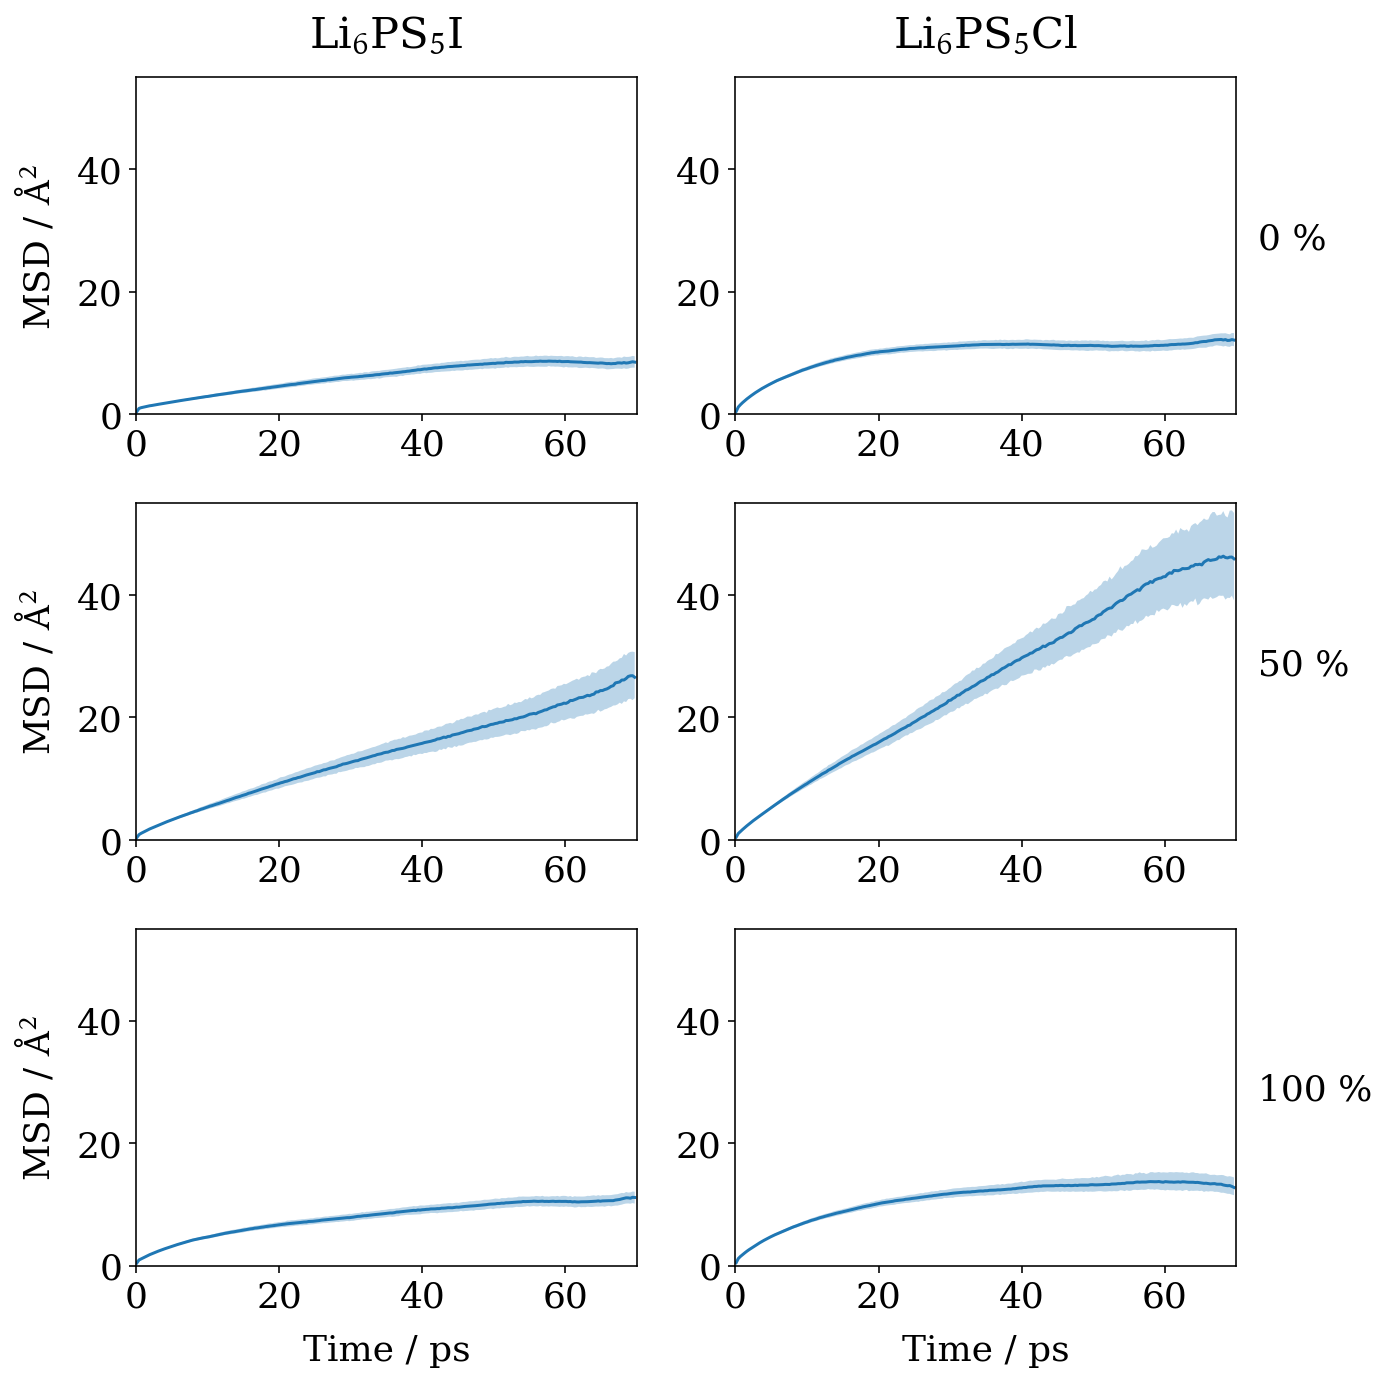

In [5]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Iowan Old Style']
rcParams['font.size'] = 18
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Iowan Old Style'
rcParams['mathtext.it'] = 'Iowan Old Style:italic'
rcParams['mathtext.bf'] = 'Iowan Old Style:bold'

# linestyle = { 'Li6PS5I': '-',
#               'Li6PS5Cl': '-' }
# axis = { 'Li6PS5I': 0,
#          'Li6PS5Cl': 1 }
# color = { '0p':   '#4e79a7', 
#           '50p':  '#f28e2b',
#           '100p': '#59a14f' }
# legends = { 'Li6PS5I': r'I',
#             'Li6PS5Cl': r'Cl',
#             '0p': '0%',
#             '50p': '50%',
#             '100p': '100%'}

fig, ax = plt.subplots(3,2,figsize=(10,10))

m = msda['Li6PS5I']['0p']
ci = [m.msd - m.msd_err[0], m.msd + m.msd_err[1]]
ax[0,0].fill_between(m.delta_t/1000, ci[0], ci[1], alpha=0.3)
ax[0,0].plot(m.delta_t/1000, m.msd)

m = msda['Li6PS5I']['50p']
ci = [m.msd - m.msd_err[0], m.msd + m.msd_err[1]]
ax[1,0].fill_between(m.delta_t/1000, ci[0], ci[1], alpha=0.3)
ax[1,0].plot(m.delta_t/1000, m.msd)

m = msda['Li6PS5I']['100p']
ci = [m.msd - m.msd_err[0], m.msd + m.msd_err[1]]
ax[2,0].fill_between(m.delta_t/1000, ci[0], ci[1], alpha=0.3)
ax[2,0].plot(m.delta_t/1000, m.msd)

m = msda['Li6PS5Cl']['0p']
ci = [m.msd - m.msd_err[0], m.msd + m.msd_err[1]]
ax[0,1].fill_between(m.delta_t/1000, ci[0], ci[1], alpha=0.3)
ax[0,1].plot(m.delta_t/1000, m.msd)

m = msda['Li6PS5Cl']['50p']
ci = [m.msd - m.msd_err[0], m.msd + m.msd_err[1]]
ax[1,1].fill_between(m.delta_t/1000, ci[0], ci[1], alpha=0.3)
ax[1,1].plot(m.delta_t/1000, m.msd)

m = msda['Li6PS5Cl']['100p']
ci = [m.msd - m.msd_err[0], m.msd + m.msd_err[1]]
ax[2,1].fill_between(m.delta_t/1000, ci[0], ci[1], alpha=0.3)
ax[2,1].plot(m.delta_t/1000, m.msd)

for i in range(3):
    for j in range(2):
        ax[i,j].set_ylim([0,55])
        ax[i,j].set_xlim([0,70])
        ax[i,j].set_xticks([0,20,40,60])
        ax[i,j].set_yticks([0,20,40])
        
xlabel = r'Time / ps'
ylabel = r'MSD / $\mathrm{\AA}^2$'
# ax[2,0].set_xticks(range(5))
ax[0,0].set_title(r'Li$_6$PS$_5$I', pad=15)
ax[0,1].set_title(r'Li$_6$PS$_5$Cl', pad=15)
ax[2,0].set_xlabel(xlabel, labelpad=10)
ax[2,0].set_ylabel(ylabel, labelpad=10)
ax[1,0].set_ylabel(ylabel, labelpad=10)
ax[0,0].set_ylabel(ylabel, labelpad=10)
ax[2,1].set_xlabel(xlabel, labelpad=10)

ax[0,1].text(73,27,'0 %')
ax[1,1].text(73,27,'50 %')
ax[2,1].text(73,27,'100 %')
    
fig.tight_layout()    
# fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig('../../figures/msd.pdf', bbox_inches='tight')
fig.show()

In [6]:
%load_ext version_information

%version_information yaml, matplotlib, numpy, pymatgen, kinisi

Software versions
Python 3.7.0 64bit [Clang 10.0.0 (clang-1000.10.44.2)]
IPython 7.0.1
OS Darwin 19.4.0 x86_64 i386 64bit
yaml 5.2
matplotlib 3.2.0rc1
numpy 1.18.3
pymatgen 2020.1.28
kinisi 0.0.1
Wed May 20 18:18:42 2020 BST